In [28]:
pip install pytorch-forecasting

ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'c:\\programdata\\anaconda3\\lib\\site-packages\\__pycache__\\typing_extensions.cpython-39.pyc'
Consider using the `--user` option or check the permissions.




  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=a0485e3487e6b13de02be4d61490892dd1094a8a848651f5e729e54d2adb2503
  Stored in directory: c:\users\eunwon\appdata\local\pip\cache\wheels\0c\09\9e\49e21a6840ef7955b06d47394afef0058f0378c0914e48b8b8
Successfully built pyperclip
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:


In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import datetime
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
# GPU setting

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#print(torch.cuda.get_device_name(0)) #Google colab = TESLA T4

In [3]:
 # Data load

df = pd.read_csv('경기도_clustered.csv',index_col = 0,encoding = 'cp949')
df = df.T
df

date,수원시,성남시,의정부시,안양시,부천시,광명시,평택시,동두천시,안산시,고양시,...,안성시,김포시,화성시,광주시,양주시,여주시,포천시,의왕시,오산시,cluster
2013-01-01,63.4,67.8,77.7,60.5,68.1,53.0,92.6,92.6,66.8,69.5,...,92.6,71.1,73.0,82.4,82.0,102.8,93.6,59.7,83.2,1.0
2013-02-01,63.3,67.2,77.4,60.2,67.7,52.9,92.5,90.9,66.6,69.0,...,92.8,70.9,72.9,82.0,81.7,102.8,93.6,59.1,83.0,1.0
2013-03-01,63.2,66.9,76.9,60.0,67.4,52.6,92.4,90.1,66.3,68.6,...,92.8,70.8,72.8,81.9,81.4,102.7,93.6,58.7,82.9,1.0
2013-04-01,63.3,67.1,76.4,59.8,67.4,52.6,92.4,90.0,66.3,68.1,...,93.5,70.7,73.2,82.3,81.7,102.7,93.9,58.6,82.9,1.0
2013-05-01,63.4,67.5,76.4,59.6,67.6,52.9,92.4,89.8,66.6,68.1,...,93.8,71.0,73.6,82.3,81.9,103.6,94.7,58.8,82.9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-01,109.5,104.8,107.2,111.7,110.2,107.3,113.2,107.7,110.7,107.6,...,114.8,105.3,111.6,107.9,109.5,106.6,108.4,112.9,115.9,0.0
2021-12-01,109.8,105.1,107.4,112.0,110.8,107.4,114.1,107.5,111.2,108.0,...,116.1,105.6,111.6,108.4,109.8,107.2,109.0,113.0,116.7,0.0
2022-01-01,109.8,105.1,107.4,111.8,110.8,107.3,114.3,107.5,111.3,108.1,...,116.9,105.6,111.5,108.7,109.8,107.1,109.2,113.0,116.8,0.0
2022-02-01,109.6,105.0,107.3,111.6,110.7,107.3,114.3,107.4,111.3,108.0,...,117.0,105.6,111.0,108.7,109.7,107.1,109.3,112.9,116.6,0.0


In [4]:
data = pd.read_csv('경기도변수.csv',index_col = 0)
data


,seoul,Avg_1,Avg_2,Avg_3,MMI,CPI,대출금리,전세가격지수 전국,전세가격지수 경기도,환율,M2,코스피,코스닥,건축허용면적,거래량 전국,거래량 경기
date,,,,,,,,,,,,,,,,
2013-01-01,73.5,64.75625,93.900000,80.1,102.868,92.728,5.78,82.689331,76.007636,1089.0,1841.1,1961.90,503.67,8413721.0,54632,13631
2013-02-01,73.2,64.42500,93.666667,79.8,90.009,93.038,5.66,82.871183,76.108044,1083.0,1857.1,2026.50,535.87,7268443.0,65640,14925
2013-03-01,73.1,64.22500,93.550000,79.6,101.388,92.952,5.54,83.162722,76.376687,1111.0,1862.4,2004.90,555.02,10160177.0,87563,17718
2013-04-01,73.2,64.30000,93.766667,79.5,101.295,92.823,5.42,83.554044,76.858189,1101.0,1867.7,1964.00,563.87,9757932.0,106498,22790
2013-05-01,73.4,64.49375,94.116667,79.6,102.313,92.823,5.24,83.797077,77.090528,1129.7,1870.3,2001.05,577.87,10837979.0,120393,25910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01,103.5,107.45625,108.650000,108.8,114.800,103.350,3.47,102.450935,103.903947,1168.6,3543.4,2970.68,992.33,14689855.0,119686,29187
2021-11-01,104.1,108.45625,110.166667,109.8,119.300,103.870,3.58,102.917900,104.543227,1187.9,3594.7,2839.01,965.63,14483042.0,111172,26593
2021-12-01,104.4,108.79375,111.033333,110.2,126.700,104.040,3.68,103.178314,104.798091,1188.8,3620.1,2977.65,1033.98,19169150.0,101766,25669


In [5]:
train = data.copy()
train 

,seoul,Avg_1,Avg_2,Avg_3,MMI,CPI,대출금리,전세가격지수 전국,전세가격지수 경기도,환율,M2,코스피,코스닥,건축허용면적,거래량 전국,거래량 경기
date,,,,,,,,,,,,,,,,
2013-01-01,73.5,64.75625,93.900000,80.1,102.868,92.728,5.78,82.689331,76.007636,1089.0,1841.1,1961.90,503.67,8413721.0,54632,13631
2013-02-01,73.2,64.42500,93.666667,79.8,90.009,93.038,5.66,82.871183,76.108044,1083.0,1857.1,2026.50,535.87,7268443.0,65640,14925
2013-03-01,73.1,64.22500,93.550000,79.6,101.388,92.952,5.54,83.162722,76.376687,1111.0,1862.4,2004.90,555.02,10160177.0,87563,17718
2013-04-01,73.2,64.30000,93.766667,79.5,101.295,92.823,5.42,83.554044,76.858189,1101.0,1867.7,1964.00,563.87,9757932.0,106498,22790
2013-05-01,73.4,64.49375,94.116667,79.6,102.313,92.823,5.24,83.797077,77.090528,1129.7,1870.3,2001.05,577.87,10837979.0,120393,25910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01,103.5,107.45625,108.650000,108.8,114.800,103.350,3.47,102.450935,103.903947,1168.6,3543.4,2970.68,992.33,14689855.0,119686,29187
2021-11-01,104.1,108.45625,110.166667,109.8,119.300,103.870,3.58,102.917900,104.543227,1187.9,3594.7,2839.01,965.63,14483042.0,111172,26593
2021-12-01,104.4,108.79375,111.033333,110.2,126.700,104.040,3.68,103.178314,104.798091,1188.8,3620.1,2977.65,1033.98,19169150.0,101766,25669


In [6]:
train.corr()

,seoul,Avg_1,Avg_2,Avg_3,MMI,CPI,대출금리,전세가격지수 전국,전세가격지수 경기도,환율,M2,코스피,코스닥,건축허용면적,거래량 전국,거래량 경기
seoul,1.000000,0.909367,0.227910,0.773868,0.655650,0.985362,-0.788762,0.821937,0.833499,0.511194,0.983945,0.713424,0.804257,0.120689,0.277253,0.461072
Avg_1,0.909367,1.000000,0.430139,0.952320,0.659035,0.914310,-0.738248,0.859271,0.864163,0.454030,0.950728,0.825427,0.851910,0.213492,0.145921,0.223406
Avg_2,0.227910,0.430139,1.000000,0.636631,0.263814,0.316192,-0.263846,0.629858,0.605018,0.122268,0.258434,0.404361,0.410531,0.467495,-0.122293,-0.113604
Avg_3,0.773868,0.952320,0.636631,1.000000,0.617700,0.802606,-0.595459,0.829918,0.825010,0.352483,0.825879,0.833771,0.805576,0.255809,-0.000097,0.046835
MMI,0.655650,0.659035,0.263814,0.617700,1.000000,0.643640,-0.508876,0.590326,0.592166,0.225834,0.660918,0.590472,0.575644,0.370323,0.317967,0.355939
CPI,0.985362,0.914310,0.316192,0.802606,0.643640,1.000000,-0.788664,0.860513,0.867821,0.477902,0.977648,0.736793,0.800200,0.135486,0.252717,0.434781
대출금리,-0.788762,-0.738248,-0.263846,-0.595459,-0.508876,-0.788664,1.000000,-0.883444,-0.897772,-0.557470,-0.827397,-0.575287,-0.730375,-0.416933,-0.542016,-0.611001
전세가격지수 전국,0.821937,0.859271,0.629858,0.829918,0.590326,0.860513,-0.883444,1.000000,0.998765,0.444093,0.854004,0.738510,0.832382,0.455081,0.319727,0.411201
전세가격지수 경기도,0.833499,0.864163,0.605018,0.825010,0.592166,0.867821,-0.897772,0.998765,1.000000,0.466121,0.866091,0.732316,0.833379,0.448879,0.337487,0.429138
환율,0.511194,0.454030,0.122268,0.352483,0.225834,0.477902,-0.557470,0.444093,0.466121,1.000000,0.525141,0.032797,0.228263,0.166043,0.125236,0.225640


In [7]:
# Training/Test ratio = 7:3

Train_ratio = 0.7

Test_ratio = 0.3

In [8]:
result =  pd.DataFrame(data=[0,0,0,0],
                             index = ['MAE','RMSE','MAPE', 'R2'],
                             columns=['test'])
result

,test
MAE,0
RMSE,0
MAPE,0
R2,0


In [52]:
for i in range(2):
    cluster = int(df[df.columns[i]][-1])
    answer = []
    for num in range(11):
        if abs(train.corr()['Avg_{}'.format(cluster+1)][num])>=0.7:
            answer.append(num)
    
    col =[]
    for j in  answer:
        col.append(train.columns[j])
    train[col]
    
    x = train[col].replace(',','')
    y = df.iloc[:-1,i:i+1]
    
    
    # Data Division

    train_x = x.iloc[0:int(len(df)*Train_ratio),:]

    train_y = y.iloc[0:int(len(df)*Train_ratio),:]

    test_x = x.iloc[int(len(df)*Train_ratio):,:]

    test_y = y.iloc[int(len(df)*Train_ratio):,:]


    # Normalizing , 둘다 학습하여 성능비교할것

    minmax = MinMaxScaler()

    standard = StandardScaler()



    train_x = minmax.fit_transform(train_x)

    train_y = minmax.fit_transform(train_y)

    test_x = minmax.fit_transform(test_x)

    test_y = minmax.fit_transform(test_y)





    # Numpy array상태로는 학습이 불가능하므로, Torch Variable 형태로 변경(data/grad/grad_fn)

    train_x_tensor = Variable(torch.Tensor(train_x))

    train_y_tensor = Variable(torch.Tensor(train_y))

    

    test_x_tensor = Variable(torch.Tensor(test_x))

    test_y_tensor = Variable(torch.Tensor(test_y))

    

    train_x_tensor_final = torch.reshape(train_x_tensor, (train_x_tensor.shape[0], 1, train_x_tensor.shape[1]))

    train_y_tensor_final = torch.reshape(train_y_tensor, (train_y_tensor.shape[0], 1, train_y_tensor.shape[1]))

    test_x_tensor_final = torch.reshape(test_x_tensor, (test_x_tensor.shape[0], 1, test_x_tensor.shape[1]))

    test_y_tensor_final = torch.reshape(test_y_tensor,(test_y_tensor.shape[0], 1, test_y_tensor.shape[1]) )


y.columns

Index(['성남시'], dtype='object', name='date')

In [53]:
    ## LSTM network modeling

    class LSTM_Jun(nn.Module):

        def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length) : 

            super(LSTM_Jun, self).__init__()
            self.num_classes = num_classes
            self.num_layers = num_layers
            self.input_size = input_size

            self.hidden_size = hidden_size

            self.seq_length = seq_length

            self.lstm = nn.LSTM(input_size = input_size, hidden_size = hidden_size, num_layers = num_layers, batch_first = True)

            self.layer_1 = nn.Linear(hidden_size, 256)

            self.layer_2 = nn.Linear(256,256)

            self.layer_3 = nn.Linear(256,128)

            self.layer_out = nn.Linear(128, num_classes)

            self.relu = nn.ReLU() #Activation Func



        def forward(self,x):

            h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)).to(device) #Hidden State

            c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)).to(device) #Internal Process States



            output, (hn, cn) = self.lstm(x, (h_0, c_0))



            hn = hn.view(-1, self.hidden_size) # Reshaping the data for starting LSTM network

            out = self.relu(hn) #pre-processing for first layer

            out = self.layer_1(out) # first layer

            out = self.relu(out) # activation func relu

            out = self.layer_2(out)

            out = self.relu(out)

            out = self.layer_3(out)

            out = self.relu(out)

            out = self.layer_out(out) #Output layer

            return out
        
 

    # Code Main

    num_epochs = 500
    learning_rate = 0.005

    input_size = int(len(x.columns))

    hidden_size = 2 # number of features in hidden state

    num_layers = 1

    num_classes = int(len(y.columns))



    LSTM_Jun = LSTM_Jun(num_classes, input_size, hidden_size, num_layers, train_x_tensor_final.shape[1]).to(device)



    loss_function = torch.nn.MSELoss()

    optimizer = torch.optim.Adam(LSTM_Jun.parameters(), lr = learning_rate)

 

    for epoch in range(num_epochs) : 

        outputs = LSTM_Jun.forward(train_x_tensor_final.to(device))

        

        
        optimizer.zero_grad()

        loss = loss_function(outputs, train_y_tensor.to(device))

        loss.backward()

        optimizer.step() # improve from loss = back propagation

        if epoch % 100 == 0 :

            print("Epoch : %d, loss : %1.5f" % (epoch, loss.item()))
            
    
    # Estimated Value

    test_predict = LSTM_Jun(test_x_tensor_final.to(device)) #Forward Pass

    predict_data = test_predict.detach().cpu().numpy() #numpy conversion

    predict_data = minmax.inverse_transform(predict_data) #inverse normalization(Min/Max)
    

    # Real Value

    real_data = test_y_tensor.data.numpy() # Real value

    real_data = minmax.inverse_transform(real_data) #inverse normalization 
    
    from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

    y_pred = predict_data
    y_test = real_data
    MAE = mean_absolute_error(predict_data, real_data)
    RMSE = np.sqrt(mean_squared_error(predict_data, real_data))
    R2 = r2_score(predict_data, real_data)
    MAPE= np.mean(np.abs((y_test - y_pred) / y_test))
    pd.options.display.float_format = '{:.5f}'.format
    label = df.columns[i]
    Result = pd.DataFrame(data=[MAE,RMSE, MAPE,R2],
                         index = ['MAE','RMSE','MAPE','R2'],
                         columns=[label])
        
    

    result = pd.concat([result,Result],axis = 1)
print(predict_data)

Epoch : 0, loss : 0.20417
Epoch : 100, loss : 0.00239
Epoch : 200, loss : 0.00091
Epoch : 300, loss : 0.00043
Epoch : 400, loss : 0.00028
[[ 83.34652 ]
 [ 83.3919  ]
 [ 83.48123 ]
 [ 83.59069 ]
 [ 84.05699 ]
 [ 84.87702 ]
 [ 85.76832 ]
 [ 87.02144 ]
 [ 87.73788 ]
 [ 87.60269 ]
 [ 87.57557 ]
 [ 87.75966 ]
 [ 89.10228 ]
 [ 90.43736 ]
 [ 90.75873 ]
 [ 90.41892 ]
 [ 89.865166]
 [ 89.82366 ]
 [ 89.48221 ]
 [ 89.271736]
 [ 90.09937 ]
 [ 90.80405 ]
 [ 92.1612  ]
 [ 92.752945]
 [ 95.701294]
 [ 98.41768 ]
 [100.77587 ]
 [103.6254  ]
 [105.192406]
 [105.2204  ]
 [103.8805  ]
 [102.627304]
 [ 99.787224]]


In [24]:
result

,test,수원시,성남시,수원시,성남시,수원시,성남시
MAE,0,4.26228,6.68841,2.34453,2.49723,3.07107,2.81484
RMSE,0,6.14745,7.91928,3.37392,3.31424,4.37952,3.91477
MAPE,0,0.04779,0.06957,0.02631,0.02634,0.03432,0.02875
R2,0,0.82889,0.00000,0.93873,0.79042,0.90472,0.58543


In [27]:
len(predict[0])

33

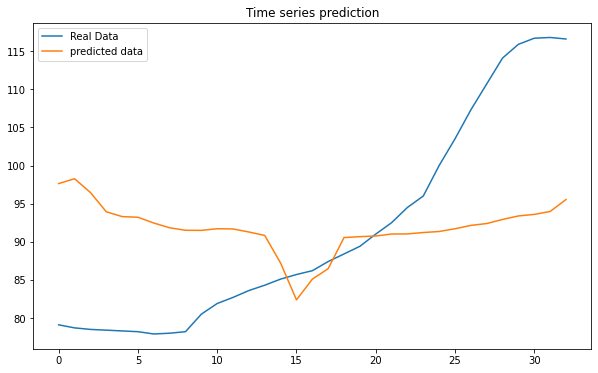

In [276]:
#Figure

plt.figure(figsize = (10,6)) # Plotting
plt.plot(real_data, label = 'Real Data')
plt.plot(predict_data, label = 'predicted data')
plt.title('Time series prediction')
plt.legend()
plt.show()

In [35]:
pip install torch -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.htmlNote: you may need to restart the kernel to use updated packages.


In [41]:
pip install pytorch_lightning

ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'c:\\programdata\\anaconda3\\lib\\site-packages\\__pycache__\\typing_extensions.cpython-39.pyc'
Consider using the `--user` option or check the permissions.




  Using cached pytorch_lightning-1.6.3-py3-none-any.whl (584 kB)
  Using cached typing_extensions-4.2.0-py3-none-any.whl (24 kB)
  Using cached pyDeprecate-0.3.2-py3-none-any.whl (10 kB)
  Using cached torchmetrics-0.8.2-py3-none-any.whl (409 kB)
  Using cached aiohttp-3.8.1-cp39-cp39-win_amd64.whl (554 kB)
  Using cached aiosignal-1.2.0-py3-none-any.whl (8.2 kB)
  Using cached async_timeout-4.0.2-py3-none-any.whl (5.8 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:


In [46]:
pip install pytorch_forecasting

Note: you may need to restart the kernel to use updated packages.


In [47]:
import pytorch_lightning as pl
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor
# import dataset, network to train and metric to optimize
from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer, QuantileLoss

In [49]:
 # Data load

df = pd.read_csv('경기도_clustered.csv',index_col = 0,encoding = 'cp949')
df = df.T
df

date,수원시,성남시,의정부시,안양시,부천시,광명시,평택시,동두천시,안산시,고양시,...,안성시,김포시,화성시,광주시,양주시,여주시,포천시,의왕시,오산시,cluster
2013-01-01,63.40000,67.80000,77.70000,60.50000,68.10000,53.00000,92.60000,92.60000,66.80000,69.50000,...,92.60000,71.10000,73.00000,82.40000,82.00000,102.80000,93.60000,59.70000,83.20000,1.00000
2013-02-01,63.30000,67.20000,77.40000,60.20000,67.70000,52.90000,92.50000,90.90000,66.60000,69.00000,...,92.80000,70.90000,72.90000,82.00000,81.70000,102.80000,93.60000,59.10000,83.00000,1.00000
2013-03-01,63.20000,66.90000,76.90000,60.00000,67.40000,52.60000,92.40000,90.10000,66.30000,68.60000,...,92.80000,70.80000,72.80000,81.90000,81.40000,102.70000,93.60000,58.70000,82.90000,1.00000
2013-04-01,63.30000,67.10000,76.40000,59.80000,67.40000,52.60000,92.40000,90.00000,66.30000,68.10000,...,93.50000,70.70000,73.20000,82.30000,81.70000,102.70000,93.90000,58.60000,82.90000,1.00000
2013-05-01,63.40000,67.50000,76.40000,59.60000,67.60000,52.90000,92.40000,89.80000,66.60000,68.10000,...,93.80000,71.00000,73.60000,82.30000,81.90000,103.60000,94.70000,58.80000,82.90000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-01,109.50000,104.80000,107.20000,111.70000,110.20000,107.30000,113.20000,107.70000,110.70000,107.60000,...,114.80000,105.30000,111.60000,107.90000,109.50000,106.60000,108.40000,112.90000,115.90000,0.00000
2021-12-01,109.80000,105.10000,107.40000,112.00000,110.80000,107.40000,114.10000,107.50000,111.20000,108.00000,...,116.10000,105.60000,111.60000,108.40000,109.80000,107.20000,109.00000,113.00000,116.70000,0.00000
2022-01-01,109.80000,105.10000,107.40000,111.80000,110.80000,107.30000,114.30000,107.50000,111.30000,108.10000,...,116.90000,105.60000,111.50000,108.70000,109.80000,107.10000,109.20000,113.00000,116.80000,0.00000
2022-02-01,109.60000,105.00000,107.30000,111.60000,110.70000,107.30000,114.30000,107.40000,111.30000,108.00000,...,117.00000,105.60000,111.00000,108.70000,109.70000,107.10000,109.30000,112.90000,116.60000,0.00000


In [50]:
data = pd.read_csv('경기도변수.csv',index_col = 0)
data


,seoul,Avg_1,Avg_2,Avg_3,MMI,CPI,대출금리,전세가격지수 전국,전세가격지수 경기도,환율,M2,코스피,코스닥,건축허용면적,거래량 전국,거래량 경기
date,,,,,,,,,,,,,,,,
2013-01-01,73.50000,64.75625,93.90000,80.10000,102.86800,92.72800,5.78000,82.68933,76.00764,1089.00000,1841.10000,1961.90000,503.67000,8413721.00000,54632,13631
2013-02-01,73.20000,64.42500,93.66667,79.80000,90.00900,93.03800,5.66000,82.87118,76.10804,1083.00000,1857.10000,2026.50000,535.87000,7268443.00000,65640,14925
2013-03-01,73.10000,64.22500,93.55000,79.60000,101.38800,92.95200,5.54000,83.16272,76.37669,1111.00000,1862.40000,2004.90000,555.02000,10160177.00000,87563,17718
2013-04-01,73.20000,64.30000,93.76667,79.50000,101.29500,92.82300,5.42000,83.55404,76.85819,1101.00000,1867.70000,1964.00000,563.87000,9757932.00000,106498,22790
2013-05-01,73.40000,64.49375,94.11667,79.60000,102.31300,92.82300,5.24000,83.79708,77.09053,1129.70000,1870.30000,2001.05000,577.87000,10837979.00000,120393,25910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01,103.50000,107.45625,108.65000,108.80000,114.80000,103.35000,3.47000,102.45093,103.90395,1168.60000,3543.40000,2970.68000,992.33000,14689855.00000,119686,29187
2021-11-01,104.10000,108.45625,110.16667,109.80000,119.30000,103.87000,3.58000,102.91790,104.54323,1187.90000,3594.70000,2839.01000,965.63000,14483042.00000,111172,26593
2021-12-01,104.40000,108.79375,111.03333,110.20000,126.70000,104.04000,3.68000,103.17831,104.79809,1188.80000,3620.10000,2977.65000,1033.98000,19169150.00000,101766,25669


In [48]:
# load data: this is pandas dataframe with at least a column for
# * the target (what you want to predict)
# * the timeseries ID (which should be a unique string to identify each timeseries)
# * the time of the observation (which should be a monotonically increasing integer)
data = df

# define the dataset, i.e. add metadata to pandas dataframe for the model to understand it
max_encoder_length = 36
max_prediction_length = 6
training_cutoff = "YYYY-MM-DD"  # day for cutoff

training = TimeSeriesDataSet(
    data[lambda x: x.date <= training_cutoff],
    time_idx= 'MMI'  # column name of time of observation
    target= 'seoul',  # column name of target to predict
    group_ids=[ date ],  # column name(s) for timeseries IDs
    max_encoder_length=max_encoder_length,  # how much history to use
    max_prediction_length=max_prediction_length,  # how far to predict into future
    # covariates static for a timeseries ID
    static_categoricals=[ ... ],
    static_reals=[ ... ],
    # covariates known and unknown in the future to inform prediction
    time_varying_known_categoricals=[ ... ],
    time_varying_known_reals=[ ... ],
    time_varying_unknown_categoricals=[ ... ],
    time_varying_unknown_reals=[ ... ],
)

# create validation dataset using the same normalization techniques as for the training dataset
validation = TimeSeriesDataSet.from_dataset(training, data, min_prediction_idx=training.index.time.max() + 1, stop_randomization=True)

# convert datasets to dataloaders for training
batch_size = 128
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=2)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size, num_workers=2)

# create PyTorch Lighning Trainer with early stopping
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=1, verbose=False, mode="min")
lr_logger = LearningRateMonitor()
trainer = pl.Trainer(
    max_epochs=100,
    gpus=0,  # run on CPU, if on multiple GPUs, use accelerator="ddp"
    gradient_clip_val=0.1,
    limit_train_batches=30,  # 30 batches per epoch
    callbacks=[lr_logger, early_stop_callback],
    logger=TensorBoardLogger("lightning_logs")
)

# define network to train - the architecture is mostly inferred from the dataset, so that only a few hyperparameters have to be set by the user
tft = TemporalFusionTransformer.from_dataset(
    # dataset
    training,
    # architecture hyperparameters
    hidden_size=32,
    attention_head_size=1,
    dropout=0.1,
    hidden_continuous_size=16,
    # loss metric to optimize
    loss=QuantileLoss(),
    # logging frequency
    log_interval=2,
    # optimizer parameters
    learning_rate=0.03,
    reduce_on_plateau_patience=4
)
print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

# find the optimal learning rate
res = trainer.lr_find(
    tft, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader, early_stop_threshold=1000.0, max_lr=0.3,
)
# and plot the result - always visually confirm that the suggested learning rate makes sense
print(f"suggested learning rate: {res.suggestion()}")
fig = res.plot(show=True, suggest=True)
fig.show()

# fit the model on the data - redefine the model with the correct learning rate if necessary
trainer.fit(
    tft, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader,
)

TypeError: 'ellipsis' object is not subscriptable